<a href="https://colab.research.google.com/github/nptikiran/Linkedin_Google_ProfileScraper/blob/main/CP_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Problem Statement:**

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

**Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2)
*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)
*   Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

(Note: Do not focus on visualization aspects when working with SAS)

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population

b)	Scatter charts between relevant variables to analyse the relationships

c)	Histogram/frequency charts to analyse the distribution of the data

d)	Heatmap of correlation analysis among the relevant variables

e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 












In [ ]:
# Import Libraries
import sys, os
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# load the dataset from local system
#location = r'C:\Users\PANKAJ\Desktop\Kiran\Kiran\Capston_Project 2\health care diabetes.csv' #(might need to move somewhere else)
# import the data
#data = pd.read_csv(location)
#data.head()

In [ ]:
# Import Data
data = pd.read_csv('/content/drive/MyDrive/health care diabetes.csv')

In [ ]:
# Shorten column names
col = ['preganant','glucose','BP','skin','insulin','BMI','pedigree','age','label']

data.columns = col
data.head()

,preganant,glucose,BP,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.preganant.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])



```
# This is formatted as code
```

### Performing Descriptive Analysis


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,preganant,glucose,BP,skin,insulin,BMI,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


from the above we can observed that there is a outliers in the columns like insulin, BP, Age, BMI etc.So next we have to remove outlier first.

###3.We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   preganant  768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   BP         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   label      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dtype_count = data.dtypes.reset_index()

In [ ]:
dtype_count.columns = ['Count','ColumnType']

In [ ]:
dtype_count.groupby('ColumnType').aggregate('Count').count().reset_index()


,ColumnType,Count
0,int64,7
1,float64,2


Above we can observe there are 7 nos of int64 variables and 2 nos. of float64 variables.

In [ ]:
# Saperate label of the data
X = data.drop('label',axis=1)
y = data.label

### 2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

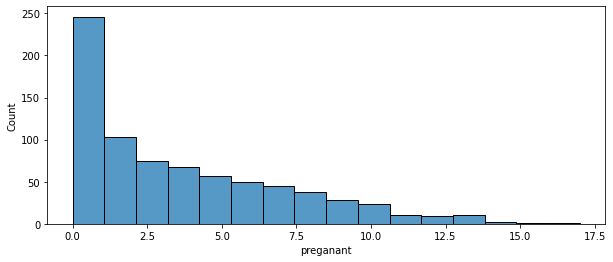

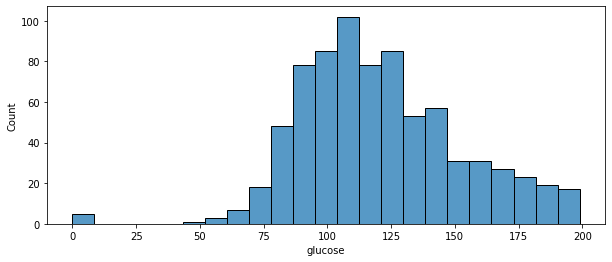

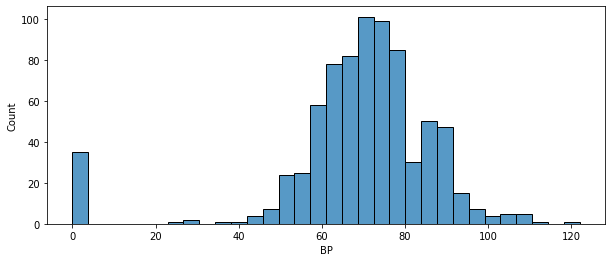

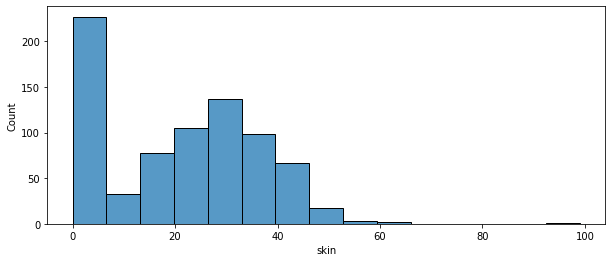

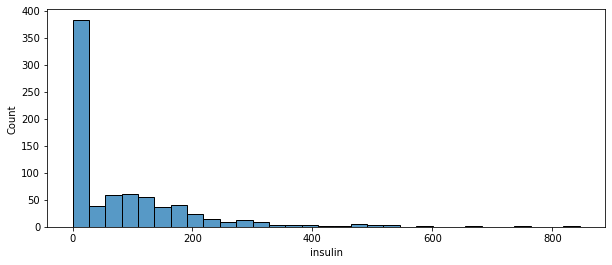

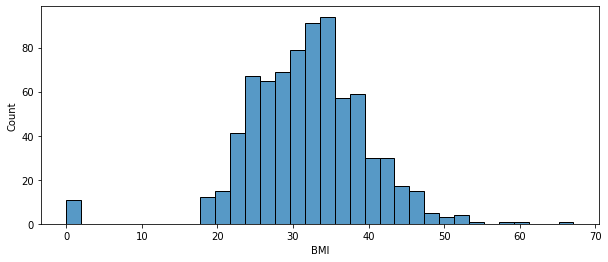

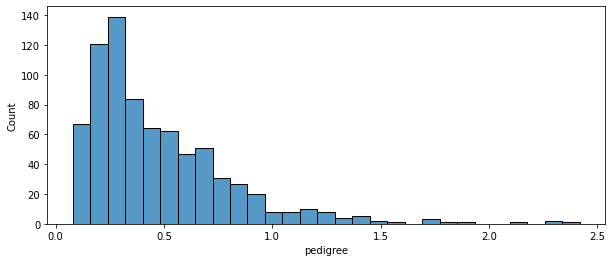

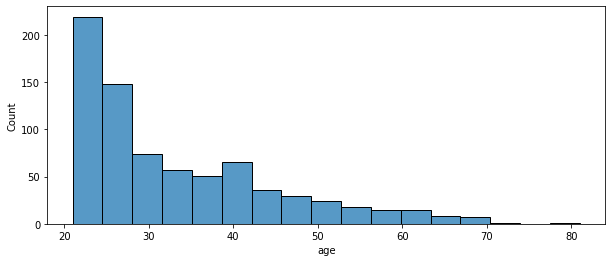

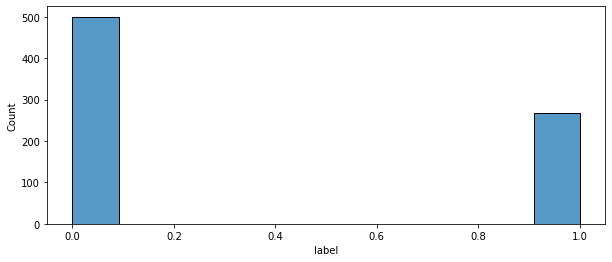

In [ ]:
# Outlier Detection
for col in data.columns:
  plt.figure(figsize=(10,4))
  sns.histplot(x= col, data=data,palette="Set2")
  plt.xlabel(col)

###Count of 0 in the columns

In [ ]:
# columns having a value of 0
(X==0).sum().sort_values(ascending=False)

insulin      374
skin         227
preganant    111
BP            35
BMI           11
glucose        5
age            0
pedigree       0
dtype: int64

In [ ]:
# columns having a value of 0 (In %)
(((X == 0)/len(X))*100).sum().round(2).sort_values(ascending=False)

insulin      48.70
skin         29.56
preganant    14.45
BP            4.56
BMI           1.43
glucose       0.65
age           0.00
pedigree      0.00
dtype: float64

In [ ]:
# IQR for all columns
xColumnNames=X.columns
print(xColumnNames)
#for j in df2ColumnNames:

for j in xColumnNames:
    try:
        print("colnames ",j)
        xy=X[j]    
        mydata=pd.DataFrame()
        #print(xy)
        updated=[]
        Q1,Q3=np.percentile(xy,[25,75])
        IQR=Q3-Q1
        minimum=Q1-1.5*IQR
        maximum=Q3+1.5*IQR
        for i in xy:
            if(i>maximum):
                print("Entering maxim")
                i=maximum
                updated.append(i)
            elif(i<minimum):
                print("entering minimum")
                i=minimum
                updated.append(i)
            else:
                updated.append(i)
        X[j]=updated
    except:
        continue



Index(['preganant', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'pedigree',
       'age'],
      dtype='object')
colnames  preganant
Entering maxim
Entering maxim
Entering maxim
Entering maxim
colnames  glucose
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
colnames  BP
entering minimum
entering minimum
entering minimum
Entering maxim
entering minimum
entering minimum
entering minimum
entering minimum
Entering maxim
Entering maxim
entering minimum
entering minimum
Entering maxim
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
Entering maxim
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
Entering maxim
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
entering minimum
Enterin

In [ ]:
X.describe()

,preganant,glucose,BP,skin,insulin,BMI,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000


In [ ]:
from scipy.stats import zscore
Z = X.apply(zscore)

In [ ]:
threashold = 3
print(np.where(Z>3))

(array([579]), array([3]))


In [ ]:
df1=X[(Z < 3)]
print(df1)

     preganant  glucose    BP  skin  insulin   BMI  pedigree   age
0          6.0    148.0  72.0  35.0      0.0  33.6     0.627  50.0
1          1.0     85.0  66.0  29.0      0.0  26.6     0.351  31.0
2          8.0    183.0  64.0   0.0      0.0  23.3     0.672  32.0
3          1.0     89.0  66.0  23.0     94.0  28.1     0.167  21.0
4          0.0    137.0  40.0  35.0    168.0  43.1     1.200  33.0
..         ...      ...   ...   ...      ...   ...       ...   ...
763       10.0    101.0  76.0  48.0    180.0  32.9     0.171  63.0
764        2.0    122.0  70.0  27.0      0.0  36.8     0.340  27.0
765        5.0    121.0  72.0  23.0    112.0  26.2     0.245  30.0
766        1.0    126.0  60.0   0.0      0.0  30.1     0.349  47.0
767        1.0     93.0  70.0  31.0      0.0  30.4     0.315  23.0

[768 rows x 8 columns]


In [ ]:
df1.describe()

,preganant,glucose,BP,skin,insulin,BMI,pedigree,age
count,768.000000,768.000000,768.000000,767.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.434159,73.652669,32.125065,0.458914,33.199870
std,3.344157,31.187468,14.197239,15.708524,93.576029,7.049584,0.285596,11.628404
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.500000,199.000000,107.000000,63.000000,318.125000,50.550000,1.200000,66.500000


Here we have handle outlier and replace them with IQR

In [ ]:
# columns having a value of zero
(X==0).sum().sort_values(ascending=False)

insulin      374
skin         227
preganant    111
age            0
pedigree       0
BMI            0
BP             0
glucose        0
dtype: int64

In [ ]:
# columns having a value of zero (In %)
(((X == 0)/len(X))*100).sum().round(2).sort_values(ascending=False)

insulin      48.70
skin         29.56
preganant    14.45
age           0.00
pedigree      0.00
BMI           0.00
BP            0.00
glucose       0.00
dtype: float64

In [ ]:
# Replace zero with mean
#df1.replace(0, df1.mean(axis=0),inplace=True)
X.replace(0, X.mean(axis=0),inplace=True)

In [ ]:
#df1.head(10)
X.head(10)

,preganant,glucose,BP,skin,insulin,BMI,pedigree,age
0,6.00000,148.0,72.0,35.000000,73.652669,33.60,0.627,50.0
1,1.00000,85.0,66.0,29.000000,73.652669,26.60,0.351,31.0
2,8.00000,183.0,64.0,20.511719,73.652669,23.30,0.672,32.0
3,1.00000,89.0,66.0,23.000000,94.000000,28.10,0.167,21.0
4,3.83724,137.0,40.0,35.000000,168.000000,43.10,1.200,33.0
5,5.00000,116.0,74.0,20.511719,73.652669,25.60,0.201,30.0
6,3.00000,78.0,50.0,32.000000,88.000000,31.00,0.248,26.0
7,10.00000,115.0,35.0,20.511719,73.652669,35.30,0.134,29.0
8,2.00000,197.0,70.0,45.000000,318.125000,30.50,0.158,53.0
9,8.00000,125.0,96.0,20.511719,73.652669,13.35,0.232,54.0


In [ ]:
df1.isnull().sum()

preganant    0
glucose      0
BP           0
skin         1
insulin      0
BMI          0
pedigree     0
age          0
dtype: int64

Here we have remove all null values.


In [ ]:
#df1.fillna(df1.mean())

###4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

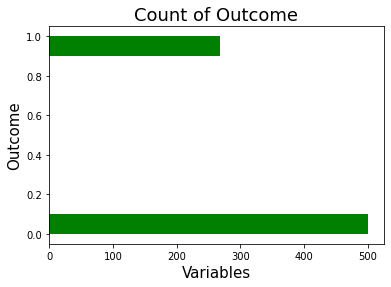

In [ ]:
plt.hist(y, orientation='horizontal',color='green')
plt.xlabel('Variables',size=15)
plt.ylabel('Outcome',size=15)
plt.title('Count of Outcome',size=18);

Above visualization of outcome shows that the non-diabetes patient are more than the diabetes patient.Here needs to check that which cases has diabetes and which cases not on which basis we can predict new data.

###5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

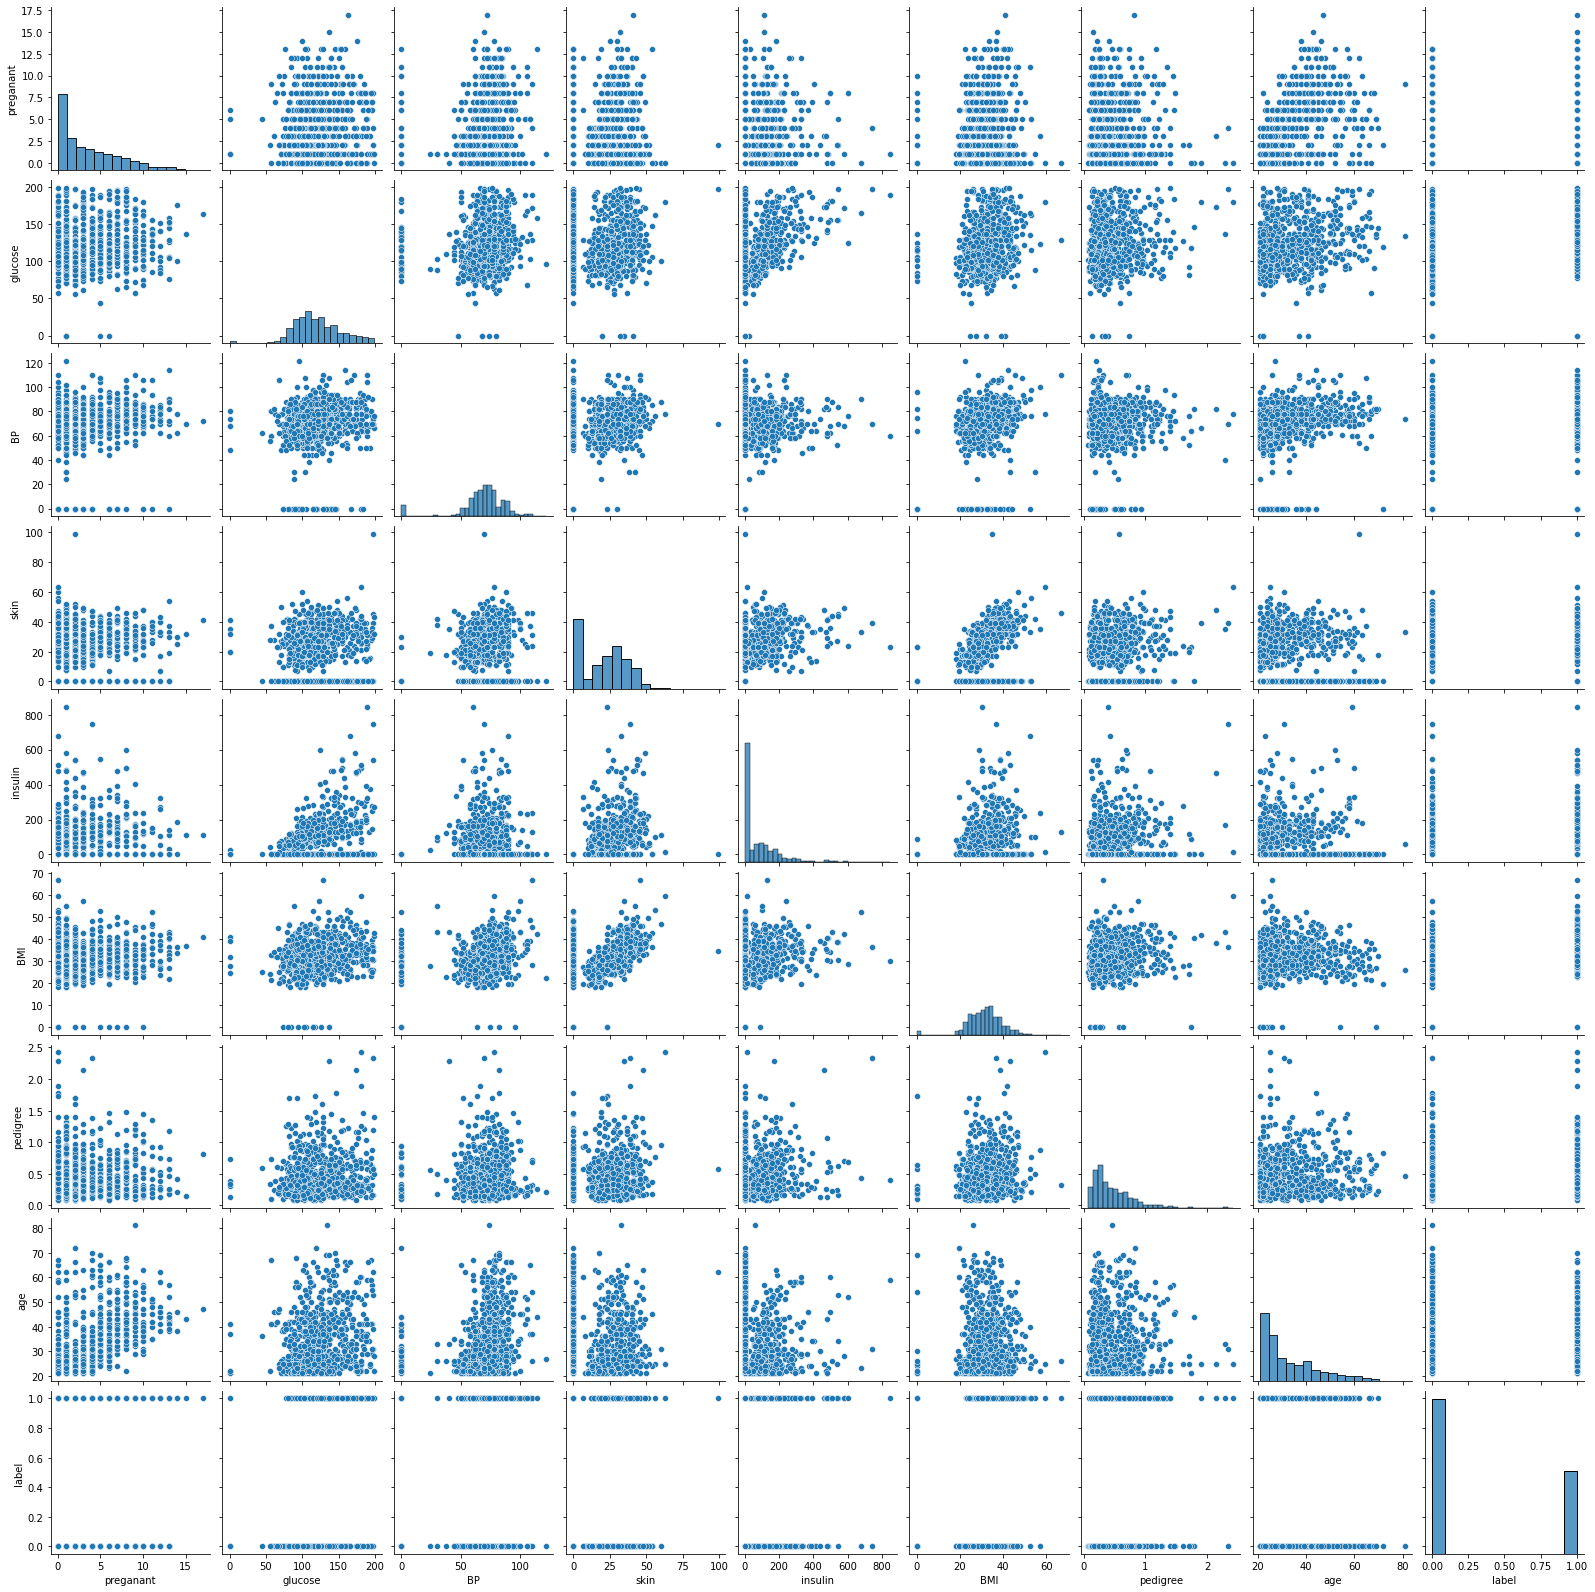

In [ ]:
sns.pairplot(data);

From above pairplot following points has observed:-
1. BMI and skin shows linear relationship.
2. Preganant and age are the variable shows correlation.
3. skin and insulin shows correlation.
4. most of the variables forms clusters arournd perticular data.


---




###6.Perform correlation analysis. Visually explore it using a heat map.

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

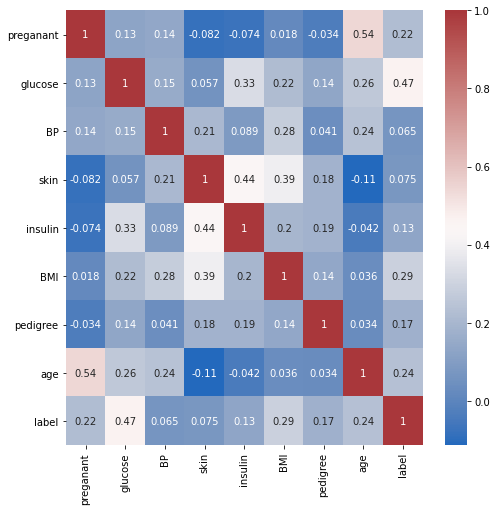

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='vlag');

###7.Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

It is a binary classification because lable has only 0 & 1 outcome.Here choose Decision Tree, Random Forest which going to compare with the KNN model.

When we split the dataset and held out another part of data. this can be cause overfitting problem. To solve this we have to cross validate data with best parameter.The best parameters can be determined by grid search techniques


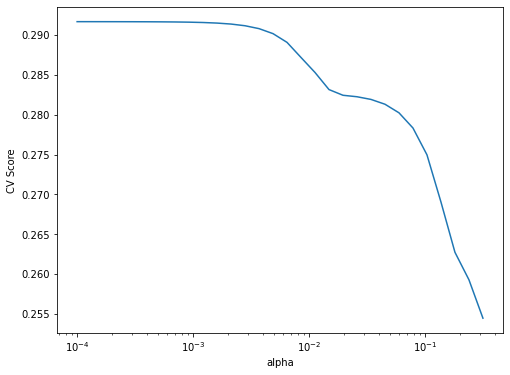

In [ ]:
# Would Cross validation be useful in this scenario?
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('CV Score');

###8.Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

### 9.Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

###**Decision Tree Classifier**




In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)

from sklearn.tree import DecisionTreeClassifier as dt

#Define classifier
clf = dt()

#Train Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test
y_predict = clf.predict(X_test)


In [ ]:
print('Classification Report :-')
print(metrics.classification_report(y_test,y_predict))
print('Accuracy:',metrics.accuracy_score(y_test, y_predict).round(4))

Classification Report :-
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       119
           1       0.58      0.73      0.64        73

    accuracy                           0.69       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.71      0.69      0.70       192

Accuracy: 0.6927


[('glucose', 0.24), ('BMI', 0.17), ('age', 0.14), ('pedigree', 0.12), ('BP', 0.09), ('preganant', 0.08), ('insulin', 0.08), ('skin', 0.07)]


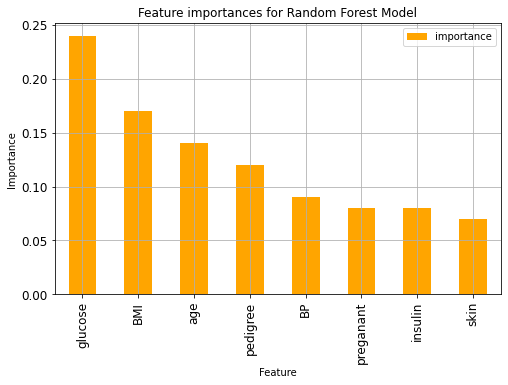

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 150, random_state=42)

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with feature and importance
feature_importances = [(feature, round(importances, 2)) for feature, importances in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,key=lambda X:X[1], reverse=True)
print(feature_importances)

# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(8, 5),
        title= 'Feature importances for Random Forest Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");



In [ ]:
from sklearn.metrics import roc_curve, auc
predictions_prob = clf.predict_proba(X_test)[:, 1]

fpr2, tpr2, thresholds  = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 1)
auc_rf = metrics.auc(fpr2, tpr2)
threashold, auc_rf.round(3)

(3, 0.855)

In [ ]:
print('Classification Report :-')
print(metrics.classification_report(y_test,y_predict))
print("Accuracy :",metrics.accuracy_score(y_test,y_predict).round(5))

Classification Report :-
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       119
           1       0.74      0.66      0.70        73

    accuracy                           0.78       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.78      0.78       192

Accuracy : 0.78125


In [ ]:
n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

train_results = []
test_results  = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
   
    # predict for all the training samples in X_train
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
   
    # repeat the above the test data
    # predict for all the training samples in X_test
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

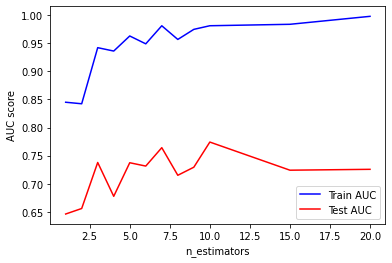

In [ ]:
plt.plot(n_estimators, train_results, 'b', label= 'Train AUC')
plt.plot(n_estimators, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend();

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)


In [ ]:
metrics.confusion_matrix(y_test, y_predict)

array([[104,  15],
       [ 32,  41]])

In [ ]:
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_predict).round(7))

kNN model accuracy: 0.7552083


In [ ]:
myList = list(range(1, 30))
neighbors = []
for i in myList:
  if i % 2 != 0:
    neighbors.append(i)

In [ ]:
from sklearn.model_selection import KFold
skf = KFold(n_splits=3, shuffle=True, random_state=None)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []

# perform k-fold cross validation
for k_value in neighbors:
    
    # instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    
    scores = cross_val_score(estimator=knn, 
                             X=X, 
                             y=y, 
                             cv = skf,
                             scoring = 'accuracy' )    
    print('K = ', k_value, ' ', scores)
    
    cv_scores.append(scores.mean())

K =  1   [0.6796875  0.65234375 0.6640625 ]
K =  3   [0.71484375 0.70703125 0.72265625]
K =  5   [0.7109375 0.734375  0.6953125]
K =  7   [0.73828125 0.7734375  0.6796875 ]
K =  9   [0.6953125 0.75      0.7734375]
K =  11   [0.7421875  0.7578125  0.76953125]
K =  13   [0.76953125 0.734375   0.74609375]
K =  15   [0.7578125 0.7421875 0.734375 ]
K =  17   [0.7421875  0.71484375 0.74609375]
K =  19   [0.75390625 0.75390625 0.74609375]
K =  21   [0.73828125 0.80859375 0.71875   ]
K =  23   [0.78125    0.75390625 0.7421875 ]
K =  25   [0.765625   0.74609375 0.72265625]
K =  27   [0.7578125  0.7734375  0.71484375]
K =  29   [0.73828125 0.75390625 0.75390625]


In [ ]:
cv_scores

[0.6653645833333334,
 0.71484375,
 0.7135416666666666,
 0.73046875,
 0.7395833333333334,
 0.7565104166666666,
 0.75,
 0.7447916666666666,
 0.734375,
 0.7513020833333334,
 0.7552083333333334,
 0.7591145833333334,
 0.7447916666666666,
 0.7486979166666666,
 0.7486979166666666]

In [ ]:
MSE = [1 - x for x in cv_scores]
MSE

[0.33463541666666663,
 0.28515625,
 0.28645833333333337,
 0.26953125,
 0.26041666666666663,
 0.24348958333333337,
 0.25,
 0.25520833333333337,
 0.265625,
 0.24869791666666663,
 0.24479166666666663,
 0.24088541666666663,
 0.25520833333333337,
 0.25130208333333337,
 0.25130208333333337]

In [ ]:
optimal_k = neighbors[MSE.index(min(MSE))]

print ("The optimal number of neighbors is ", optimal_k)

The optimal number of neighbors is  23


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=11)

clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

print("kNN model accuracy:", metrics.accuracy_score(y_test, y_predict).round(7))

kNN model accuracy: 0.7604167


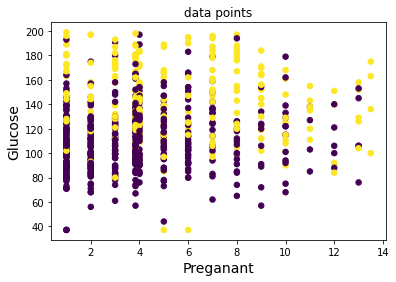

In [ ]:
Xs = X.iloc[:, 0].values
ys = X.iloc[:, 1].values
plt.scatter(Xs,ys, s=30, c=data.label)
plt.title('data points')
plt.xlabel('Preganant', fontsize=14)
plt.ylabel('Glucose', fontsize=14);

### 9.Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

In [ ]:
kf = KFold(n_splits=10, shuffle= True, random_state=20)

In [ ]:
%%time

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)} #for evaluating the quality of a model’s predictions:

#estimator = {'estimator':['RandomForestClassifier()','KNeighborsClassifier()']}

params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
          'max_depth':    [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14],
          'max_features': ['sqrt', 'log2', None],
          'max_samples':  [0.1, 0.3, 0.9, 1.0],
          'min_samples_split': np.linspace(0.1, 1, 5)
          }


gs     = GridSearchCV(estimator = RandomForestClassifier(), 
                                param_grid= params, 
                                scoring=scoring,
                                n_jobs=4,
                                cv=kf,
                                return_train_score=True,
                                refit= 'AUC',
                            )
gs.fit(X_train, y_train)
gs.best_params_

CPU times: user 4min 48s, sys: 5.56 s, total: 4min 53s
Wall time: 1h 1min 27s


Here best parameter find out with the help of grid search CV.Now with this parameter we will going to check the accuracy for the classifier.

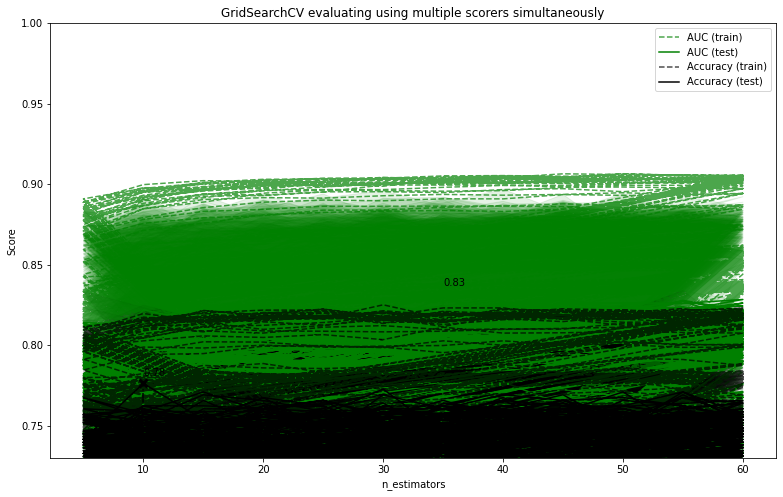

In [ ]:
param_name = "n_estimators"
results    = gs.cv_results_

plt.figure(figsize=(13, 8))

plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=12)

plt.xlabel(param_name)
plt.ylabel("Score")

ax = plt.gca()
# ax.set_xlim(0, 1)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_%s' % (param_name)].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    
    for sample, style in (('train', '--'), ('test', '-')):
        
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std  = results[ 'std_%s_%s' % (sample, scorer)]
        
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        
        ax.plot(X_axis, 
                sample_score_mean, 
                style, 
                color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, 
            [0, best_score],
            linestyle='-.', 
            color=color, 
            marker='x', 
            markeredgewidth=3, 
            ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)

**Visualization at Tableau Public given in link.**

https://public.tableau.com/views/CapstonProject2/Heatmap?:language=en&:display_count=y&publish=yes&:origin=viz_share_link